# Лабораторная 5

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

Загрузка предобуч модели

In [2]:
model = MobileNet(weights='imagenet')

Наш видеофайл:

In [3]:
video_path = 'baby_dog8.mp4'

In [4]:
cap =cv2.VideoCapture(video_path)
last_frame = None  # Для хранения одного кадра

while True:
    ret, frame = cap.read()
    if not ret:
        break
    img_resized = cv2.resize(frame, (224, 224))
    img_array = image.img_to_array(img_resized)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    
    #Предсказание
    preds = model.predict(img_array)
    decoded = decode_predictions(preds, top=1)[0][0]
    label = f"{decoded[1]}: {decoded[2]*100:.2f}%"

    # Улучшенная надпись с фоном
    (w, h), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 1.5, 3)
    cv2.rectangle(frame, (10, 10), (10 + w + 10, 10 + h + 20), (0, 0, 0), -1)
    cv2.putText(frame, label, (15, 10 + h + 10), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 255, 0), 3)

    cv2.imshow('MobileNet Video Classification', frame)

    #текущий кадр
    last_frame = frame.copy()

    # Выход 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1

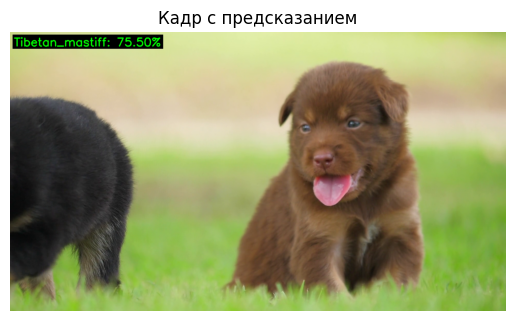

In [5]:
if last_frame is not None:
    frame_rgb = cv2.cvtColor(last_frame, cv2.COLOR_BGR2RGB)
    plt.imshow(frame_rgb)
    plt.axis('off')
    plt.title("Кадр с предсказанием")
    plt.show()